In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [2]:
sales = pd.read_csv('lm-model.csv')
sales.head(3)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy


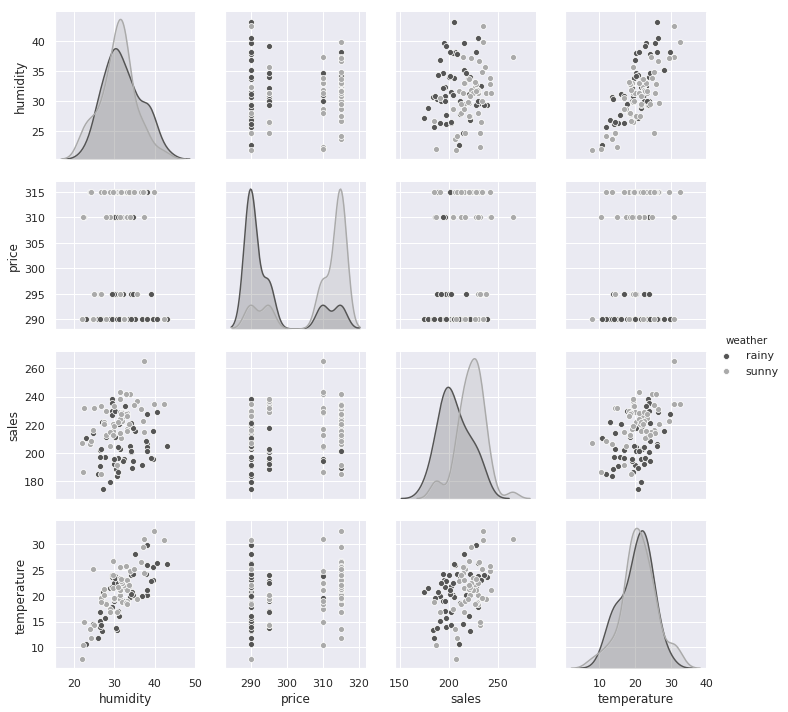

In [3]:
sns.pairplot(data=sales, hue='weather', palette='gray')

In [4]:
lm_dame = smf.ols('sales~price', sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [5]:
sm.stats.anova_lm(lm_dame, typ=2)

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


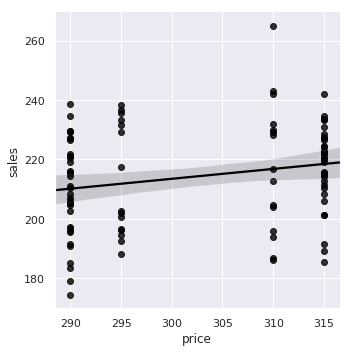

In [6]:
sns.lmplot(
    x='price',
    y='sales',
    data=sales,
    scatter_kws={'color': 'black'},
    line_kws={'color': 'black'}
)

In [7]:
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


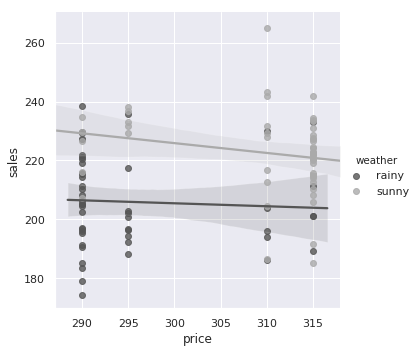

In [8]:
sns.lmplot(
    x='price',
    y='sales',
    data=sales,
    hue='weather',
    palette='gray'
)

In [9]:
lm_sales = smf.ols(
    'sales ~ weather + humidity + temperature + price',
    data=sales
).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [10]:
sm.stats.anova_lm(lm_sales, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [11]:
# 通常の分散分析では、説明変数の順番を入れ替えて見ると、検定の結果が変わってしまう
# 例えばhumidity(湿度)のp値が0.6ほどになり、売り上げに優位な影響を与えないという結果になる
lm_sales_2 = smf.ols(
    'sales ~ weather + temperature + humidity + price',
    data=sales
).fit()
sm.stats.anova_lm(lm_sales_2, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [12]:
# 分散分析をやめて回帰係数のt検定をするとこの問題は起こらない
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [14]:
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [15]:
mod_null = smf.ols('sales~1', sales).fit()
resid_sq_null = sp.sum(mod_null.resid ** 2)
resid_sq_null

28968.525899999993

In [16]:
mod_1 = smf.ols('sales~weather', sales).fit()
resid_sq_1 = sp.sum(mod_1.resid ** 2)
resid_sq_1

21917.565

In [17]:
resid_sq_null - resid_sq_1

7050.960899999995

In [18]:
sm.stats.anova_lm(mod_1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,31.527,0.0
Residual,98.0,21917.565,223.649,NaN,NaN


In [19]:
mod_2 = smf.ols(
    'sales ~ weather + humidity',
    sales
).fit()
resid_sq_2 = sp.sum(mod_2.resid ** 2)
resid_sq_2

20137.963897851758

In [20]:
resid_sq_1 - resid_sq_2

1779.601102148241

In [21]:
sm.stats.anova_lm(mod_2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,33.963,0.000
humidity,1.0,1779.601,1779.601,8.572,0.004
Residual,97.0,20137.964,207.608,NaN,NaN


In [22]:
mod_2_2 = smf.ols(
    'sales ~ weather + temperature',
    sales
).fit()
resid_sq_2_2 = sp.sum(mod_2_2.resid ** 2)
resid_sq_2_2

18102.78642671223

In [23]:
mod_3_2 = smf.ols(
    'sales ~ weather + temperature + humidity',
    sales
).fit()
resid_sq_3_2 = sp.sum(mod_3_2.resid ** 2)
resid_sq_3_2

18061.11936158843

In [24]:
resid_sq_2_2 - resid_sq_3_2

41.667065123801876

In [25]:
sm.stats.anova_lm(mod_3_2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,37.478,0.000
temperature,1.0,3814.779,3814.779,20.277,0.000
humidity,1.0,41.667,41.667,0.221,0.639
Residual,96.0,18061.119,188.137,NaN,NaN


In [26]:
mod_full = smf.ols(
    'sales ~ weather + humidity + temperature + price',
    sales
).fit()
resid_sq_full = sp.sum(mod_full.resid ** 2)
resid_sq_full

17242.716942366485

In [27]:
mod_non_humi = smf.ols(
    'sales ~ weather + temperature + price',
    sales
).fit()
resid_sq_non_humi = sp.sum(mod_non_humi.resid ** 2)
resid_sq_non_humi

17299.142016107664

In [28]:
resid_sq_non_humi - resid_sq_full

56.425073741178494

In [29]:
sm.stats.anova_lm(mod_full, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [30]:
mod_full.compare_f_test(mod_non_humi)

(0.31087803756965626, 0.5784533427120666, 1.0)

In [31]:
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


In [32]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

In [33]:
# 全変数入りモデル
mod_full.aic.round(3)

808.785

In [34]:
# 湿度抜きモデル
mod_non_humi.aic.round(3)

807.112